In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("../data/credit-score-data.csv")

In [3]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,...,Recency,Frequency,Monetary,Stability,Recency_WoE,Frequency_WoE,Monetary_WoE,Stability_WoE,predicted_prob,predicted_label
0,76871,36123,3957,887,4406,256,6,10,3,-0.046371,...,90,119,-5.591789,0.024673,-1.886379,13.489380,12.390767,12.390767,0.004425,0
1,73770,15642,4841,3829,4406,256,4,6,2,-0.054643,...,90,119,-5.591789,0.024673,-1.886379,13.489380,12.390767,12.390767,0.004425,0
2,26203,53941,4229,222,4683,256,6,1,3,-0.050426,...,90,2,-0.100852,0.000000,-1.886379,-1.608747,11.195163,-1.574980,0.000142,0
3,380,102363,648,2185,988,256,1,21,3,0.107717,...,90,38,-0.215326,0.139241,-1.886379,13.040990,11.249230,11.249230,0.007210,0
4,28195,38780,4841,3829,988,256,4,6,2,-0.059704,...,90,38,-0.215326,0.139241,-1.886379,13.040990,11.249230,11.249230,0.007210,0


In [4]:
rfms_features = ['Recency', 'Frequency', 'Monetary', 'Stability']
# Features (X) and Target (y)
X = df[[feature + '_WoE' for feature in rfms_features]]
y = df['FraudResult']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 76529 samples
Testing set: 19133 samples


In [5]:
# Initialize the model
LogisticRegression_model = LogisticRegression(random_state=42)

In [7]:
LogisticRegression_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [8]:
# Initialize the model
DecisionTree_model = DecisionTreeClassifier(random_state=42)

In [9]:
DecisionTree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
# Initialize the model
RandomForest_model = RandomForestClassifier(random_state=42)

In [11]:
RandomForest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Logistic Regression
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
logreg_grid = GridSearchCV(LogisticRegression(random_state=42), logreg_params, cv=5, scoring='roc_auc')
logreg_grid.fit(X_train, y_train)

# Decision Tree
dt_params = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='roc_auc')
dt_grid.fit(X_train, y_train)

# Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='roc_auc')
rf_grid.fit(X_train, y_train)

c:\Users\Abdulaziz\Desktop\10 Academy\Bati Bank\week6\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Abdulaziz\Desktop\10 Academy\Bati Bank\week6\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Abdulaziz\Desktop\10 Academy\Bati Bank\week6\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Abdulaziz\Deskt

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [13]:
# Best parameters for each model
print("Logistic Regression - Best Parameters:", logreg_grid.best_params_)
print("Decision Tree - Best Parameters:", dt_grid.best_params_)
print("Random Forest - Best Parameters:", rf_grid.best_params_)

Logistic Regression - Best Parameters: {'C': 1, 'penalty': 'l2'}
Decision Tree - Best Parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Random Forest - Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [14]:
# Use best models for prediction
logreg_model = logreg_grid.best_estimator_
dt_model = dt_grid.best_estimator_
rf_model = rf_grid.best_estimator_

In [15]:
models = {
    'Logistic Regression': logreg_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model
}

In [16]:
# Evaluate each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
    print("\n")

Model: Logistic Regression
Accuracy: 0.9983797627136362
Precision: 0.7272727272727273
Recall: 0.2222222222222222
F1 Score: 0.3404255319148936
ROC-AUC Score: 0.9979221576396525


Model: Decision Tree
Accuracy: 0.9982752312758062
Precision: 0.56
Recall: 0.3888888888888889
F1 Score: 0.45901639344262296
ROC-AUC Score: 0.9151677401337035


Model: Random Forest
Accuracy: 0.9983797627136362
Precision: 0.5806451612903226
Recall: 0.5
F1 Score: 0.5373134328358209
ROC-AUC Score: 0.9972981503784771




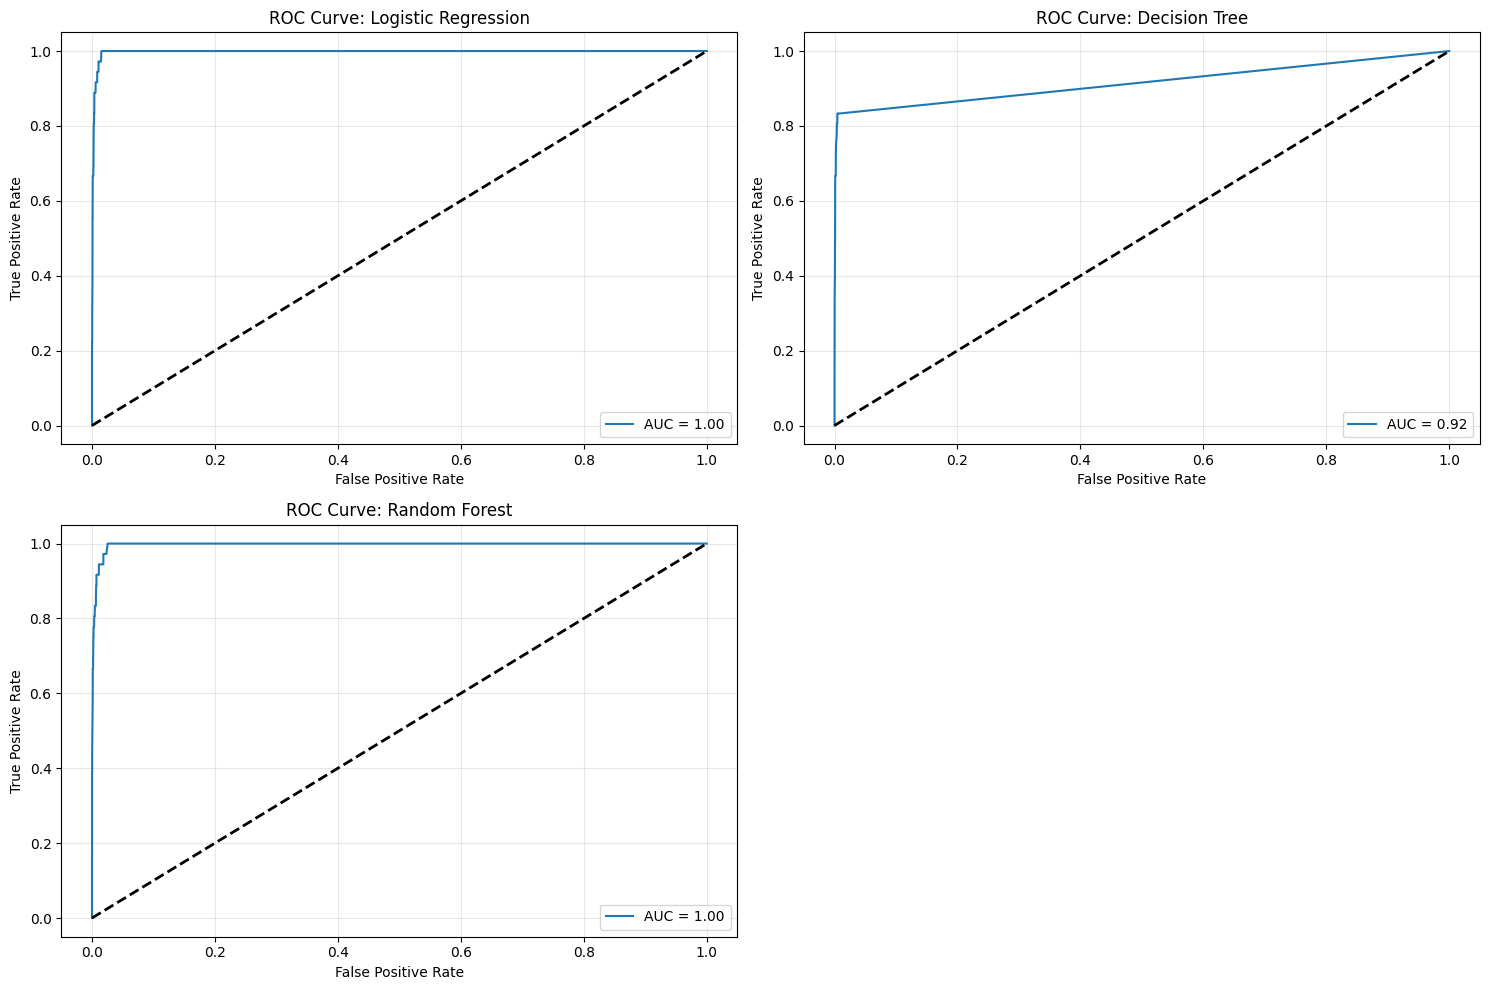

In [26]:
# Define the number of rows and columns for subplots
n_models = len(models)
n_cols = 2
n_rows = (n_models + 1) // n_cols

# Initialize the figure
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Evaluate each model and plot the ROC curve in subplots
for idx, (model_name, model) in enumerate(models.items()):
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Plot ROC curve
    axs[idx].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    axs[idx].plot([0, 1], [0, 1], 'k--', lw=2)
    axs[idx].set_xlabel('False Positive Rate')
    axs[idx].set_ylabel('True Positive Rate')
    axs[idx].set_title(f'ROC Curve: {model_name}')
    axs[idx].legend(loc='lower right')
    axs[idx].grid(alpha=0.3)

# Remove any empty subplots
for ax in axs[n_models:]:
    fig.delaxes(ax)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

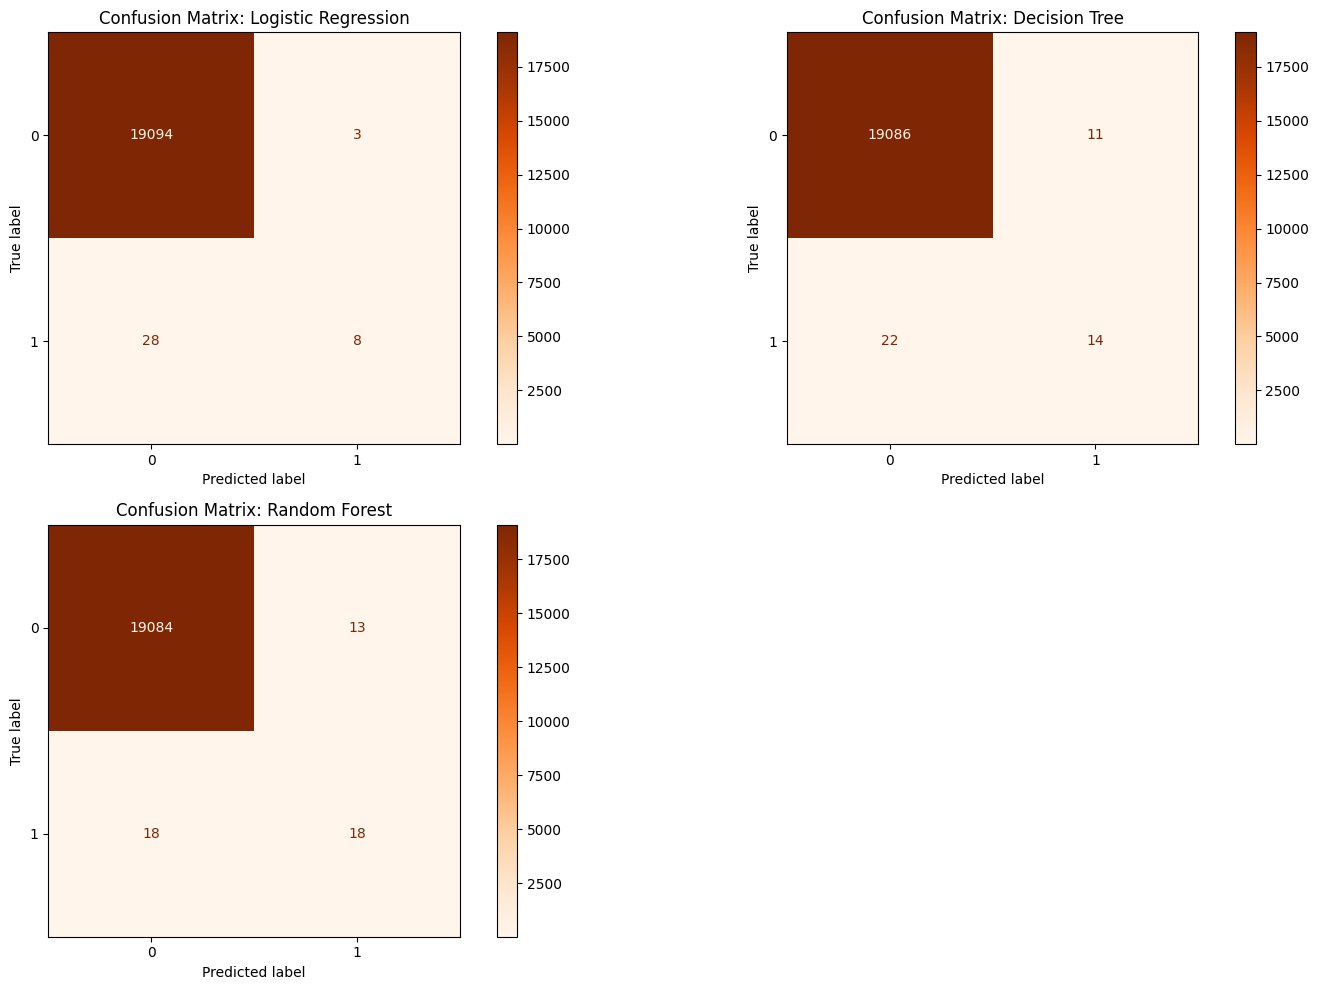

In [27]:
# Define the number of rows and columns for subplots
n_models = len(models)
n_cols = 2
n_rows = (n_models + 1) // n_cols

# Initialize the figure
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Evaluate each model and plot the confusion matrix in subplots
for idx, (model_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

    # Plot confusion matrix
    disp.plot(ax=axs[idx], cmap=plt.cm.Oranges, values_format='d')
    axs[idx].set_title(f'Confusion Matrix: {model_name}')

# Remove any empty subplots
for ax in axs[n_models:]:
    fig.delaxes(ax)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()